Importing libraries

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import random
#from itertools import combinations
#from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from pickle import dump

Function used to plot confusion matrix

In [2]:
def plot_confusion_matrix(y,y_predict):

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not edge', 'edge']); 
    ax.yaxis.set_ticklabels(['not edge', 'edge'])

Reading the graph

In [3]:
G = nx.read_gml("GraphMissingEdges.gml")
#categories = pd.read_csv('categories.csv')

In [4]:
nx.info(G) #graph info

'Graph with 4575 nodes and 18991 edges'

Selecting 'edges' e 'non_edges' samples

In [5]:
null_edges = list(nx.non_edges(G))
edges = list(nx.edges(G))
m = len(edges)
#nodes = list(G.nodes)
null_edges_sample = random.sample(null_edges, m) #selecting the size of non_edges in the same size of edges
#n = len(null_edges_sample)    

Defining train set (edges and non_edges) equaly

In [6]:
#prop = 0.2
#edges_subset = random.sample(edges, int(prop * m))
#null_edges_subset = random.sample(null_edges_sample, int(prop * n))

#g_train = G.copy()
#g_train.remove_edges_from(edges_subset)

train_edges = edges
train_edges_false = null_edges_sample
#train_edges_false = list((Counter(null_edges_sample) - Counter(null_edges_subset)).elements())

#test_edges = list(edges_subset)
#test_edges_false = list(null_edges_subset)

In [7]:
print(len(train_edges), len(train_edges_false))
#print(len(test_edges), len(test_edges_false))
#print(nx.info(g_train))

18991 18991


Obtaining jaccard coefficient of edges and non_edges training set

In [8]:
pred_jc_true = nx.jaccard_coefficient(G, train_edges)
pred_jc_false = nx.jaccard_coefficient(G, train_edges_false)

In [9]:
jc_true = []
jc_false = []
jc_scores = []
node1 = []
node2 = []

for u, v, p in pred_jc_true:
    node1.append(u)
    node2.append(v)
    jc_true.append(p)
for u, v, p in pred_jc_false:
    node1.append(u)
    node2.append(v)
    jc_false.append(p)

jc_scores = jc_true + jc_false

df_dict = {}
df_dict['Node1'] = node1
df_dict['Node2'] = node2
df_dict['JC_score'] = jc_scores

Obtaining preferential attachment coefficient of edges and non_edges training set

In [10]:
pred_pa_true = nx.preferential_attachment(G, train_edges)
pred_pa_false = nx.preferential_attachment(G, train_edges_false)

In [11]:
pa_true = []
pa_false = []
pa_scores = []

pa_scores = [s for (u,v,s) in pred_pa_true] + [s for (u,v,s) in pred_pa_false]
   
df_dict['PA_score'] = pa_scores 

Obtaining resource allocation index of edges and non_edges training set

In [12]:
pred_ra_true = nx.resource_allocation_index(G, train_edges)
pred_ra_false = nx.resource_allocation_index(G, train_edges_false)

In [13]:
ra_true = []
ra_false = []
ra_scores = []

ra_scores = [s for (u,v,s) in pred_ra_true] + [s for (u,v,s) in pred_ra_false]

df_dict['RA_score'] = ra_scores

***The following measures was not possible because results in "by zero division"

In [14]:
#pred_cn_true = common_neighbor_centrality(G, train_edges)
#pred_cn_false = common_neighbor_centrality(G, train_edges_false)

In [15]:
#cn_true = []
#cn_false = []

#for u, v, p in pred_cn_true:
#    cn_true.append(p)
#for u, v, p in pred_cn_false:
#    cn_false.append(p)
    
#df_dict['CN_score'] = cn_true + cn_false

In [16]:
#pred_aa_true = nx.adamic_adar_index(G, train_edges)
#pred_aa_false = nx.adamic_adar_index(G, train_edges_false)

#aa_score = [s for (u,v,s) in pred_aa_true] + [s for (u,v,s) in pred_aa_false]

In [17]:
#aa_true = []
#aa_false = []

#for u, v, p in pred_aa_true:
#    aa_true.append(p)
#for u, v, p in pred_aa_false:
#    aa_false.append(p)
    
#df_dict['AA_score'] = aa_true + aa_false

Defining labels of edges as 1 and non_edges as 0

In [18]:
is_edge = [ 1 ] * len(train_edges) + [ 0 ] * len(train_edges_false)
df_dict['is_edge'] = is_edge

Creating a dataframe based on Jaccard Coefficient, Preferential Attachment and Resource Allocation Index

In [19]:
df = pd.DataFrame(df_dict)
df = df.sample(frac=1).reset_index(drop=True)

In [20]:
df.head()

,Node1,Node2,JC_score,PA_score,RA_score,is_edge
0,n_wY0w5KUlL2wo2d4fDq-g,17DImn_vPnuwU9hhRFXlUA,0.0,77,0.0,0
1,hDD6-yk1yuuRIvfdtHsISg,SLEs-l3CaZn2KRUL8GRAZg,0.0,116,0.0,0
2,4LiieRb-_r9pUCM0mKS9XA,cYzbqbWg-RRhqB8eYesuLg,0.0,75,0.0,1
3,3eexaenBq8HvkTiYjVl3Pg,pwAUK5IdkBV2ddliPvNx-g,0.0,282,0.0,0
4,IydiH1DIlyvwvpbkC9m42Q,o47aY911-1rK9tHeXOWxFg,0.0,324,0.0,1


Labels are perfectly balanced due to samples taken equally before

<AxesSubplot:xlabel='is_edge', ylabel='count'>

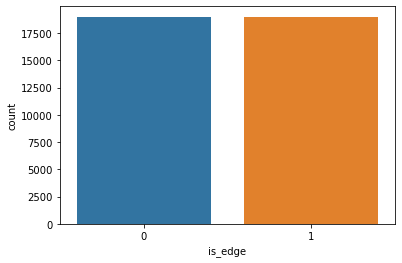

In [21]:
sns.countplot(x=df["is_edge"])

In [22]:
df.describe()

,JC_score,PA_score,RA_score,is_edge
count,37982.000000,37982.000000,37982.000000,37982.000000
mean,0.021675,886.480938,0.059731,0.500000
std,0.092836,2477.712646,0.422614,0.500007
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,0.000000
50%,0.000000,69.000000,0.000000,0.500000
75%,0.017857,612.000000,0.015808,1.000000
max,0.995671,53824.000000,20.762719,1.000000


Standardizing features by removing the mean and scaling to unit variance - StandardScaler

In [23]:
feature_names = ['JC_score', 'PA_score', 'RA_score']
X = df[feature_names]
y = df['is_edge'].to_numpy()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Splitting in train and test data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Testing different classification algorithms

### Logistic Regression

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
logreg_score = logreg.score(X_test, y_test)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg_score))

Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.80


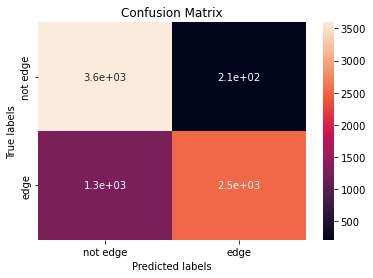

In [27]:
yhat_lr=logreg.predict(X_test)
plot_confusion_matrix(y_test,yhat_lr)

### Decision Tree Classifier

In [28]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
dt_score = clf.score(X_test, y_test)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt_score))

Accuracy of Decision Tree classifier on training set: 0.86
Accuracy of Decision Tree classifier on test set: 0.82


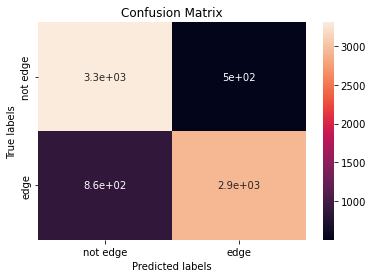

In [30]:
yhat_clf=clf.predict(X_test)
plot_confusion_matrix(y_test,yhat_clf)

### K-Nearest Neighbors

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
knn_score = knn.score(X_test, y_test)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_score))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.82


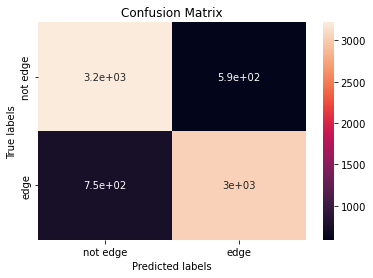

In [33]:
yhat_knn=knn.predict(X_test)
plot_confusion_matrix(y_test,yhat_knn)

### Linear Discriminant Analysis

In [34]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [35]:
lda_score = lda.score(X_test, y_test) 
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda_score))

Accuracy of LDA classifier on training set: 0.72
Accuracy of LDA classifier on test set: 0.72


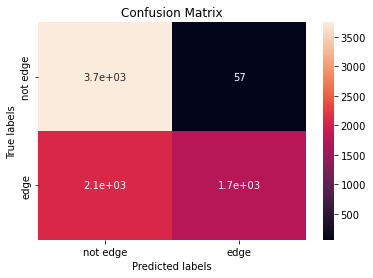

In [36]:
yhat_lda=lda.predict(X_test)
plot_confusion_matrix(y_test,yhat_lda)

### Gaussian Naive Bayes

In [37]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [38]:
gnb_score = gnb.score(X_test, y_test)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb_score))

Accuracy of GNB classifier on training set: 0.72
Accuracy of GNB classifier on test set: 0.72


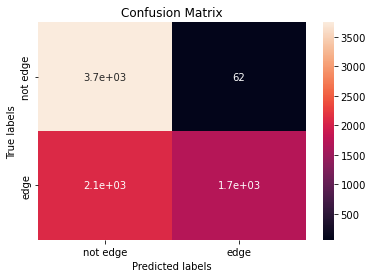

In [39]:
yhat_gnb=gnb.predict(X_test)
plot_confusion_matrix(y_test,yhat_gnb)

### Support Vector Machine

In [40]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [41]:
svm_score = svm.score(X_test, y_test)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm_score))

Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.82


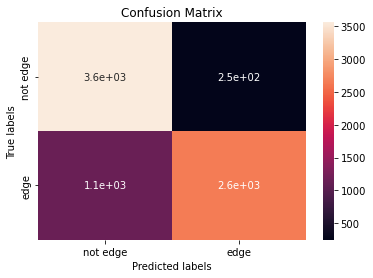

In [42]:
yhat_svc=svm.predict(X_test)
plot_confusion_matrix(y_test,yhat_svc)

#### Plotting accuracy scores

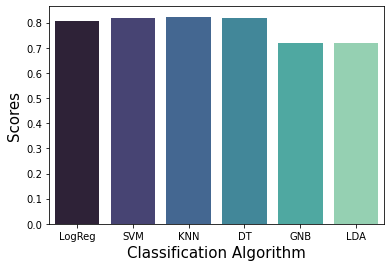

In [43]:
scores = {'LogReg':logreg_score, 'SVM':svm_score,'KNN':knn_score,
           'DT':dt_score, 'GNB':gnb_score, 'LDA':lda_score}

keys = list(scores.keys())
values = list(scores.values())
sns.barplot(x=keys, y=values, palette="mako")

plt.xlabel('Classification Algorithm', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.show()

Saving the best models - KNN and Decision Tree Classifier

In [44]:
dump(knn, open('model_knn.pkl', 'wb'))
dump(clf, open('model_clf.pkl', 'wb'))

dump(scaler, open('scaler.pkl', 'wb'))

Calculating MSE of all tested models to compare

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
mse_logreg = mean_squared_error(y_test, yhat_lr)
mse_svm = mean_squared_error(y_test, yhat_svc)
mse_knn = mean_squared_error(y_test, yhat_knn)
mse_dt = mean_squared_error(y_test, yhat_clf)
mse_gnb = mean_squared_error(y_test, yhat_gnb)
mse_lda = mean_squared_error(y_test, yhat_lda)

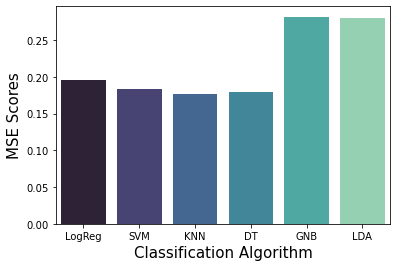

In [47]:
scores_mse = {'LogReg':mse_logreg, 'SVM':mse_svm,'KNN':mse_knn,
           'DT':mse_dt, 'GNB':mse_gnb, 'LDA':mse_lda}

keys_mse = list(scores_mse.keys())
values_mse = list(scores_mse.values())
sns.barplot(x=keys_mse, y=values_mse, palette="mako")

plt.xlabel('Classification Algorithm', fontsize = 15)
plt.ylabel('MSE Scores', fontsize = 15)
plt.show()

Calculating F1 Score of all tested models to compare

In [48]:
from sklearn.metrics import f1_score

In [49]:
f1_logreg = f1_score(y_test, yhat_lr)
f1_svm = f1_score(y_test, yhat_svc)
f1_knn = f1_score(y_test, yhat_knn)
f1_dt = f1_score(y_test, yhat_clf)
f1_gnb = f1_score(y_test, yhat_gnb)
f1_lda = f1_score(y_test, yhat_lda)

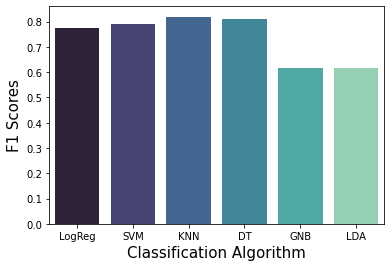

In [50]:
scores_f1 = {'LogReg':f1_logreg, 'SVM':f1_svm,'KNN':f1_knn,
           'DT':f1_dt, 'GNB':f1_gnb, 'LDA':f1_lda}

keys_f1 = list(scores_f1.keys())
values_f1 = list(scores_f1.values())
sns.barplot(x=keys_f1, y=values_f1, palette="mako")

plt.xlabel('Classification Algorithm', fontsize = 15)
plt.ylabel('F1 Scores', fontsize = 15)
plt.show()